# A Simple Illustration of Bayesian Probability with a Binomial Distribution

Suppose we have a discrete set of possible probabilities $q$ of an event E with some prior beliefs about which probability is the true probability of the event E. That is, we have a **probability mass function** that takes discrete values within $q$ and maps them to a discrete probability space, where 

$$
P(p=w) = 0, \forall{w \notin q}
$$

$$
\sum_{w}{P(p=w)} = 1, w \in q
$$

We then observe some independent events and wish to update our prior beliefs accordingly. We observe $k$ occurences over $n$ trials, and wish to update our probabilities accordingly.

From Bayes' Rule, we know that

$$
P(p=w | k, n) = \frac{P(k | p=w, n)P(p=w|n)}{P(k|n)}
$$

We can now use this information to calculate our posterior of $p$ by using the fact that independent events occuring with some probability $p$ follow a Bernoulli distribution, and so the total number of events follow a binomial distribution. Using this for $P(n, k|p=w)$, we can now solve for our posterior for each defined value of p. 

This is implemented below:

# Code to Find Posterior Distribution Given Binomial Prior

In [1]:
## Finds posterior distribution of observed values assuming that k follows a binomial distribution. p is discrete in this case.

numerator <- function(k, n, posprobs, probsofprobs){
  ## finds the numerator -- ie P(k|p)P(p)
  ## k (integer) : the total number of observed successes.
  ## n (integer) : the total number of observed trials.
  ## posprobs (vector): possible p values associated with the random variable k.
  ## probsofprobs (vector): this is our prior, mapping a probability to each possible probability

  function(p){
    ## For a particular p, this will find the posterior probability of p given observed values. This is a function generator -- given
    ## values of k and n, we can then find the probability of any particular p.
    x <- posprobs[p]
    px <- probsofprobs[p]

    res <- (x^k)*((1 - x)^(n-k))*px
    return(res)
  }
}

denominator <- function(k,n, posprobs, probsofprobs){
  ## Finds the denominator, the multiplicative constant. Same for all values of p. P(k)
  sum(sapply(X = 1:length(posprobs),FUN= numerator(k,n, posprobs, probsofprobs)))
}

probabilityfinder <- function(k,n,p, posprobs, probsofprobs){
  ## Finds the posterior probability of a particular p value.
  numerator(k,n, posprobs, probsofprobs)(p)/denominator(k,n, posprobs, probsofprobs)
}

posterior <- function(k,n, posprobs, probsofprobs){
  ## Finds the posterior probability mass function of the p values.
  sapply(X = 1:length(posprobs),FUN=function(p) probabilityfinder(k,n,p, posprobs, probsofprobs))
}

log_transf_numerator <- function(k,n){
  ## finds the numerator -- ie P(k|p)P(p), using log transform to avoid machine zeros
  ## k (integer) : the total number of observed successes.
  ## n (integer) : the total number of observed trials.
  ## posprobs (vector): possible p values associated with the random variable k.
  ## probsofprobs (vector): this is our prior, mapping a probability to each possible probability
  function(p){
    ## For a particular p, this will find the posterior probability of p given observed values. This is a function generator -- given
    ## values of k and n, we can then find the probability of any particular p.

    x <- posprobs[p]
    px <- probsofprobs[p]

    mx <- max(sapply(posprobs, function(pr) k*log(pr) + (n - k)*log(1 - pr)))

    res <- exp(k*log(x) + (n - k)*log(1 - x) - mx) * probsofprobs[p]
    return(res)
  }
}

log_transf_denominator <- function(k,n){
  ## Finds the denominator, the multiplicative constant, using log transform for machine zeros. Same for all values of p. P(k)

  sum(sapply(X = 1:length(posprobs),FUN= log_transf_numerator(k,n)))
}

log_transf_probabilitydist <- function(k,n,p){
  ## Finds the posterior probability of a particular p value using log transform.
  log_transf_numerator(k,n)(p)/log_transf_denominator(k,n)
}

log_transf_posterior <- function(k,n){
  ## Finds the posterior probability mass function of the p values using log transform

  sapply(X = 1:length(posprobs),FUN=function(x) log_transf_probabilitydist(k,n,x))
}



# Example: Thunderstorms

Consider if we observed 11 positive events in 27 days -- as an example, the number of thunderstorms in a month. We want to estimate the probability of a thunderstorm given the new information. Assuming weather each day is independent (which is a simplifying assumption), we can assume that the number of thunderstorms in $n$ days can be modeled by a binomial distribution. 

Suppose we have the following **prior** probability mass function about the discrete values of $p$:

[\
P(p = w) = 
\begin{cases}
    .07 ,& \text{if } w=.05\\
    .13 ,& \text{if } w=.15\\
    .26 ,& \text{if } w=.25\\
    .26 ,& \text{if } w=.35\\
    .13 ,& \text{if } w=.45\\
    .07 ,& \text{if } w=.55\\
    .02 ,& \text{if } w=.65\\
    .02 ,& \text{if } w=.75\\
    .02 ,& \text{if } w=.85\\
    .02 ,& \text{if } w=.95\\
    0,              & \text{otherwise}
\end{cases}
\]


If we believe prior to this that the distribution looks as it does above (with the highest belief in 35 and 45%), we can now find the posterior of the probabilities after observing the 11 thunderstorms as follows:


In [2]:
posprobs <- c(.05,.15,.25,.35,.45,.55,.65,.75,.85,.95)
probsofprobs <- c(.07,.13,.26,.26,.13,.07,.02,.02,.02,.02)

pos <- posterior(11,27,posprobs, probsofprobs)
round(pos, 3)

[1] 0.000 0.002 0.128 0.524 0.287 0.057 0.002 0.000 0.000 0.000

So we now believe with 0.524 probability that the actual $p$ is .35. This means the data supports the assumption of .35 chance of thunderstorms a day, given our prior beliefs and the independence of events.


# Behaviors for different $n$ and $k$

Now, let us investigate the behaviors for various sample sizes, $n$, and number of observed thunderstorms $k$. 

In [3]:
n <- c(10,50,100,150,200,300,500)
k <- lapply(n, function(n) seq(n/10,n,n/10))
col_names = as.factor(1:10 /10)
row_names = paste('P(p=', posprobs, ')')
list_names = paste('n=', n)

iter_j = 1:10; names(iter_j) = col_names
iter_i = 1:7; names(iter_i) = list_names
dimthreedfs = lapply(iter_i,function(i) data.frame(sapply(iter_j, function(j) posterior(k[[i]][j],n[i], posprobs, probsofprobs)), check.names=FALSE))

In [4]:
dimthreedfs = lapply(dimthreedfs, function(y) round(y, 3))

In [5]:
dimthreedfs

0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
0.160,0.030,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.328,0.209,0.096,0.035,0.010,0.002,0.000,0.000,0.000,0.000
0.354,0.427,0.371,0.255,0.141,0.062,0.020,0.004,0.000,0.000
0.137,0.266,0.373,0.415,0.372,0.263,0.136,0.043,0.006,0.000
0.020,0.058,0.123,0.208,0.283,0.304,0.239,0.116,0.026,0.003
0.002,0.009,0.030,0.075,0.152,0.245,0.287,0.208,0.070,0.010
0.000,0.000,0.002,0.009,0.029,0.070,0.124,0.137,0.070,0.015
0.000,0.000,0.000,0.002,0.011,0.043,0.123,0.219,0.182,0.064
0.000,0.000,0.000,0.000,0.002,0.012,0.064,0.215,0.338,0.225
0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.058,0.306,0.683


In [6]:
library(ggplot2)
library(reshape2)

create_gg_heatmap <- function(df){
    mat = as.matrix(df)
    melted = melt(mat)
    colnames(melted) = c('k', 'p', 'posterior')
    plt = ggplot(data = melted, aes(x=k,y=p, fill=posterior)) +  geom_tile() + 
    scale_fill_gradientn(limits = c(0, 1), colors=c("navyblue", "darkmagenta", "darkorange1"))
    return(plt)
}

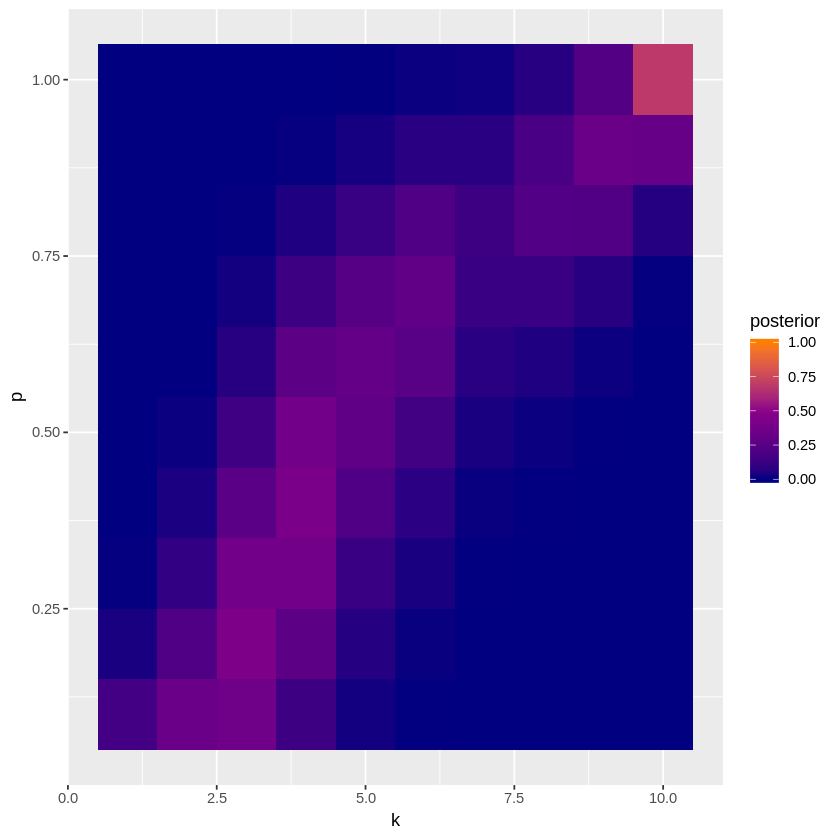

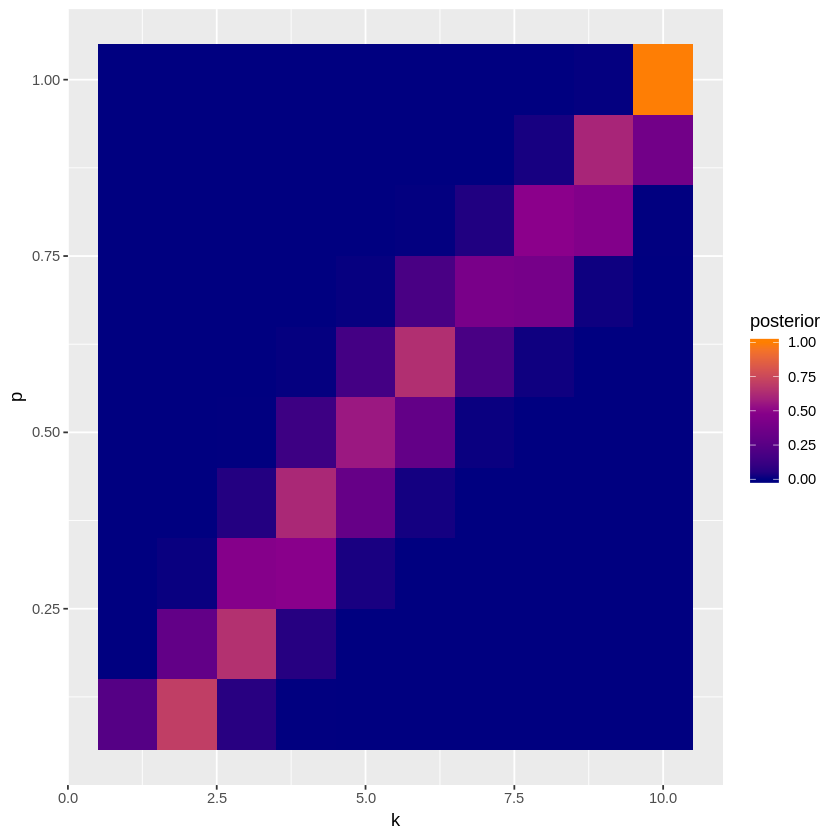

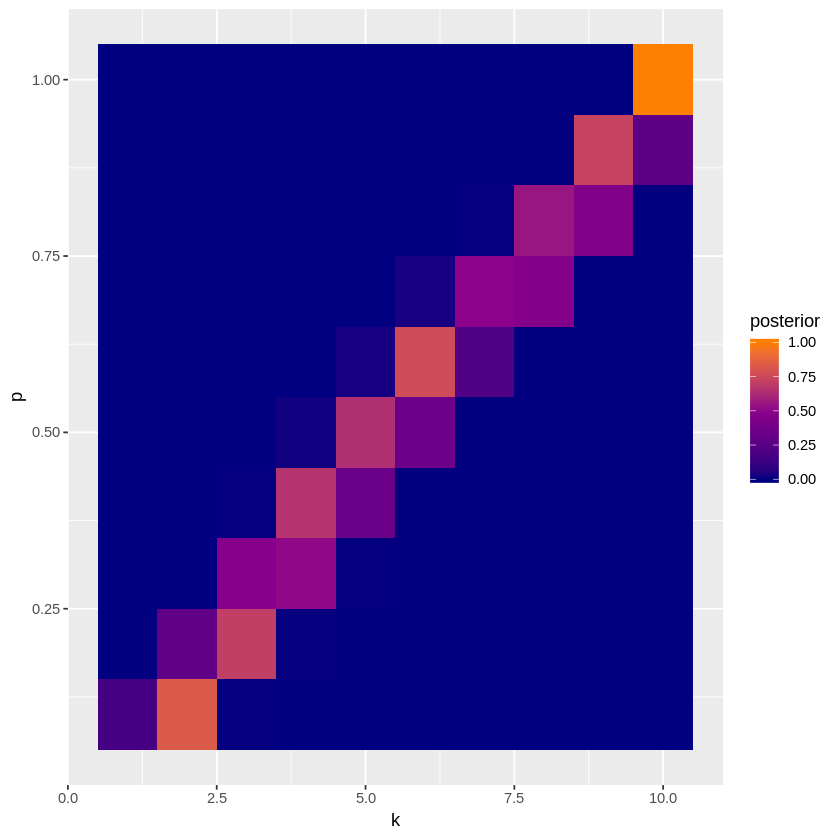

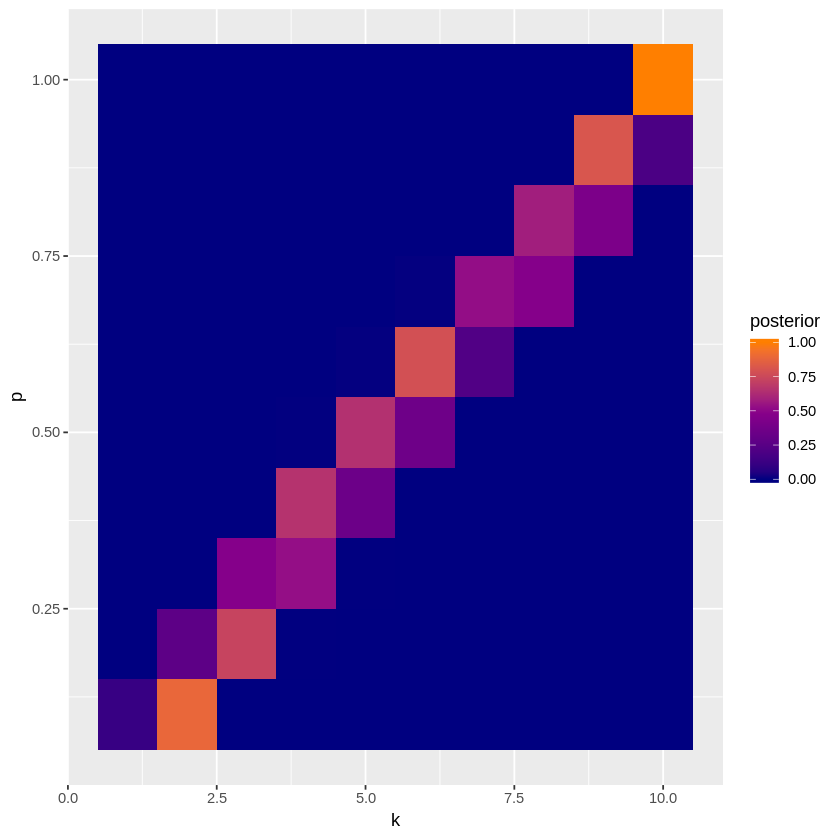

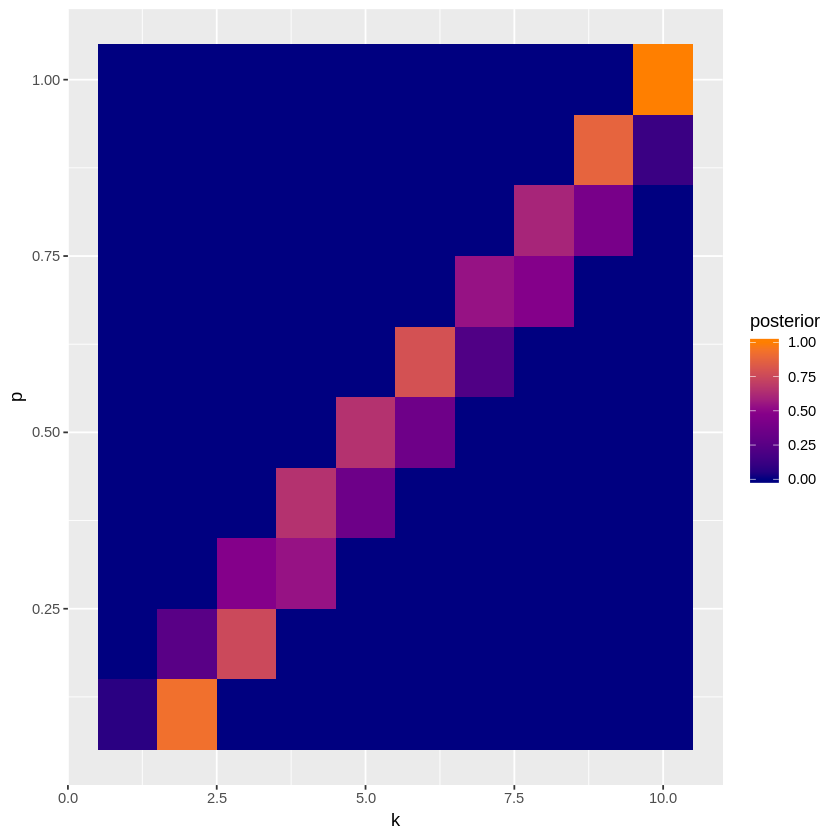

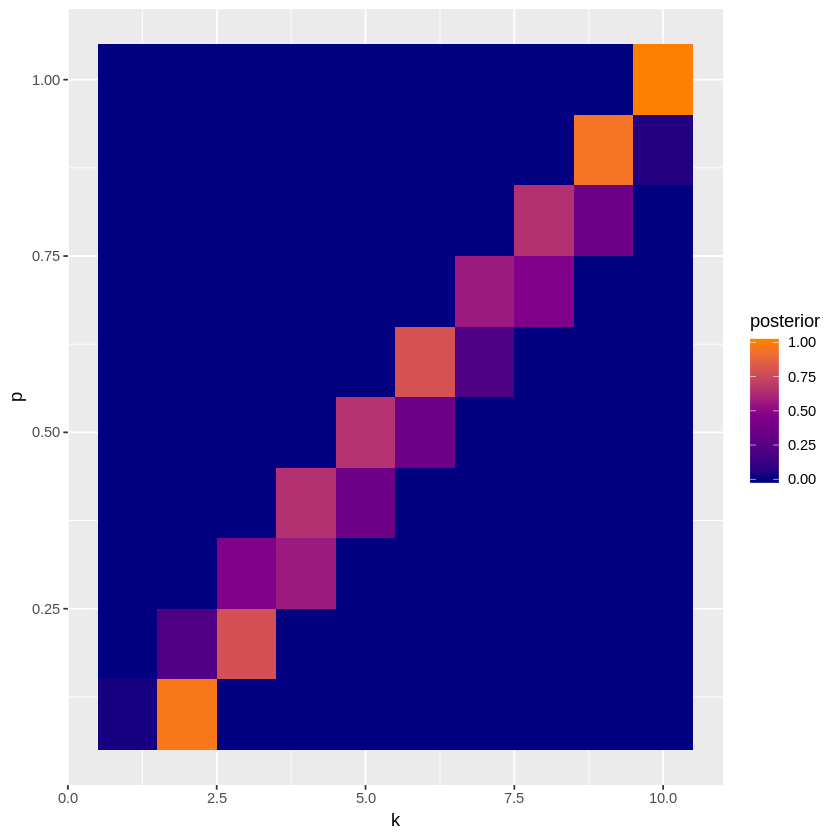

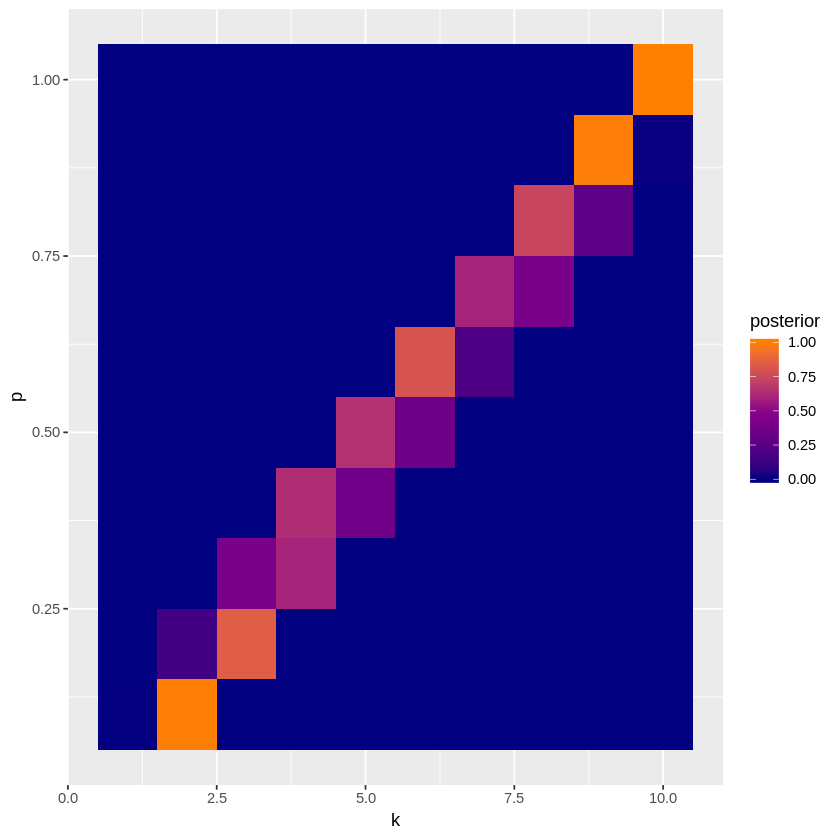

In [7]:
for(df in dimthreedfs){
    print(create_gg_heatmap(df))
}

Each list represents $n$ for $n \in \{10, 50, 100, 150, 200, 300, 500\}$, and each column represents possible $k$ values from $\frac{n}{10}$ to $n$.

The heatmaps shows us that the probabilities become more polarized as $n$ increases, which is what we would expect. We see that with small $n$ the colors are fuzzy, reflecting our uncertainty concerning our estimate.

We see what is expected with Bayesian probabilities: as $n$ increases, our confidence in our posterior probability becomes stronger. This is reflected in the fact that we get values that are nearly 1 for the observations
which have p = k/n and 0 otherwise. This shows that as we get more observations, the data will overwhelm the prior.

For small values of $n$, we see the opposite: it is highly skewed by our prior, so that we are not so confident that $p$ = $\frac{k}{n}$ if $p$ was not deemed probable prior.


# Machine Zeros problem:

In [8]:
posterior(1000,2000, posprobs, probsofprobs)

[1] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN

Notice that we have many machine zeros for large n. This interferes with our calculations, and gives us NaNs for the calculations.
The following uses a log transformation to avoid machine zeros:



In [9]:
posterior(1000,2000, posprobs, probsofprobs)
log_transf_posterior(1000,2000)

[1] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN

[1]  0.000000e+00 5.596221e-289 3.467465e-121  3.312387e-37  6.500000e-01
 [6]  3.500000e-01  2.547990e-38 2.667281e-122 8.609571e-290  0.000000e+00